In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from os import listdir, getcwd, walk
from os.path import isfile, join
import matplotlib.pyplot as plt

%matplotlib inline

c:\users\musaho\anaconda3\lib\site-packages\pandas\compat\_optional.py:106: UserWarning: Pandas requires version '1.2.1' or newer of 'bottleneck' (version '1.0.0' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
# mypath = getcwd()
for (dirpath, dirnames, filenames) in walk(".", topdown=True):
    for name in filenames:
        print(join(dirpath, name))

.\churn capstone.ipynb
.\targeted_marketing.pdf
.\UCI Machine Learning Repository_ Bank Marketing Data Set.html
.\.ipynb_checkpoints\churn capstone-checkpoint.ipynb
.\bank\bank-full.csv
.\bank\bank-names.txt
.\bank\bank.csv
.\bank-additional\bank-additional\.DS_Store
.\bank-additional\bank-additional\.Rhistory
.\bank-additional\bank-additional\bank-additional-full.csv
.\bank-additional\bank-additional\bank-additional-names.txt
.\bank-additional\bank-additional\bank-additional.csv
.\bank-additional\__MACOSX\._bank-additional
.\bank-additional\__MACOSX\bank-additional\._.DS_Store
.\UCI Machine Learning Repository_ Bank Marketing Data Set_files\logo.gif
.\UCI Machine Learning Repository_ Bank Marketing Data Set_files\Logo_25blk.gif
.\UCI Machine Learning Repository_ Bank Marketing Data Set_files\ml.css
.\UCI Machine Learning Repository_ Bank Marketing Data Set_files\nsfe.gif
.\UCI Machine Learning Repository_ Bank Marketing Data Set_files\rexaSmall.jpg


In [3]:
df_full = pd.read_csv('bank-additional/bank-additional/bank-additional-full.csv', delimiter=";")

In [4]:
df_full.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [43]:
df = df_full.copy()
df = df.replace('unknown', 'other')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

 **drop values where call duration is less than 6 secs, because a call that short is likely useless**

In [45]:
df['duration'] = df['duration'].apply(lambda x : x/60).round(2)
df = df[df['duration']>6/60]

In [46]:
df = df[df['education']!= 'other']

In [47]:
df['day_of_week'] = df['day_of_week'].map({'mon': 0, 'tue': 1, 'wed': 3, 'thu': 4, 
                                                    'fri': 5, 'sat': 6, 'sun': 7})
df['month'] = df['month'].map({'jan': 0, 'feb': 1, 'mar': 2, 'apr': 3, 
                                'may': 4, 'jun': 5, 'jul': 6, 'aug': 7, 'sep': 8, 'oct':9, 'nov':10, 'dec': 11})

# EXPLORATORY DATA ANALYSIS

In [48]:
categorical=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
numerical=['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 
           'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

## Categorical features

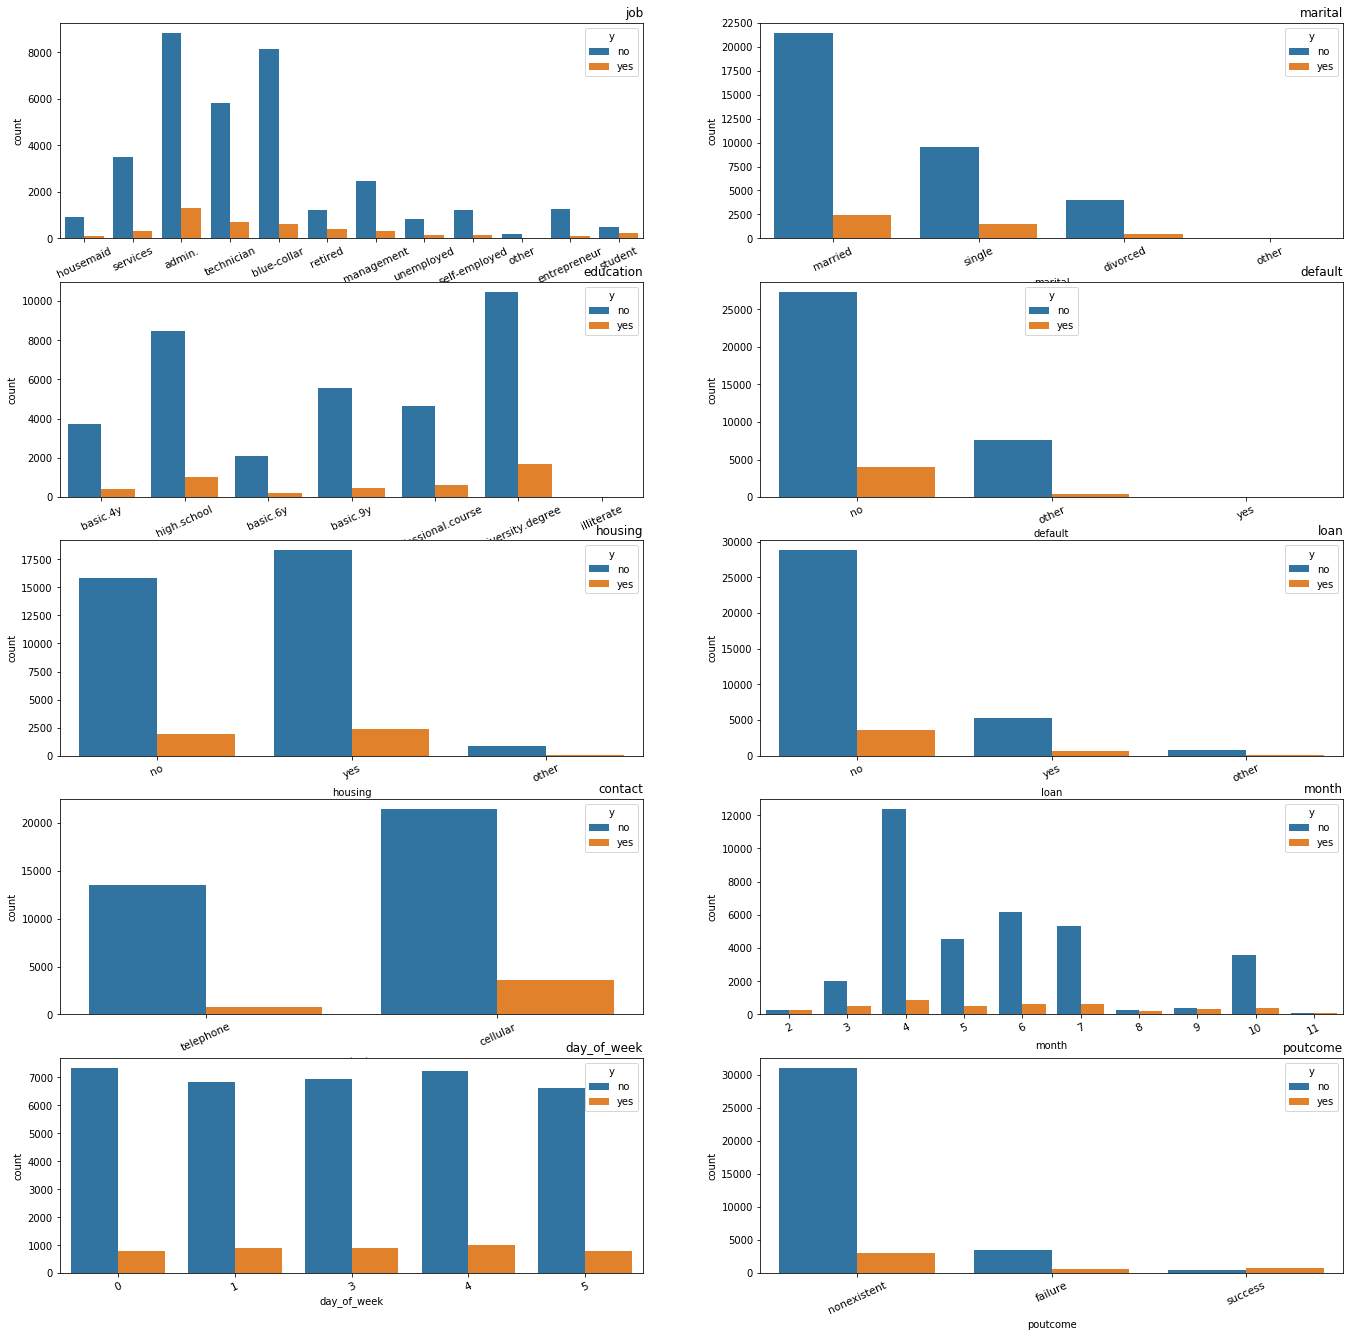

In [49]:
rows, cols = 5, 2
fig, ax = plt.subplots(rows, cols, figsize=(23,23))
row, col = 0, 0
for i, feature in enumerate(categorical):
    if col==cols-1:
        row+=1
    col = i%cols
    sns.countplot(df[feature], ax=ax[row,col], hue=df['y']).set_title(feature, loc='right')
    ax[row, col].set_xticklabels(labels=ax[row, col].get_xticklabels() ,rotation=25, fontsize=10.5)

### Insights
* that dataset is clearly unbalanced as we can see mot of the catgeorical features there is a very low number of subscribers compared to the those that didn't
* in the job categorical feature, it seems the subcribe/nonsubcribe ratio for students and retired is worth the study(doesnt look that imbalanced)

## numerical features

c:\users\musaho\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


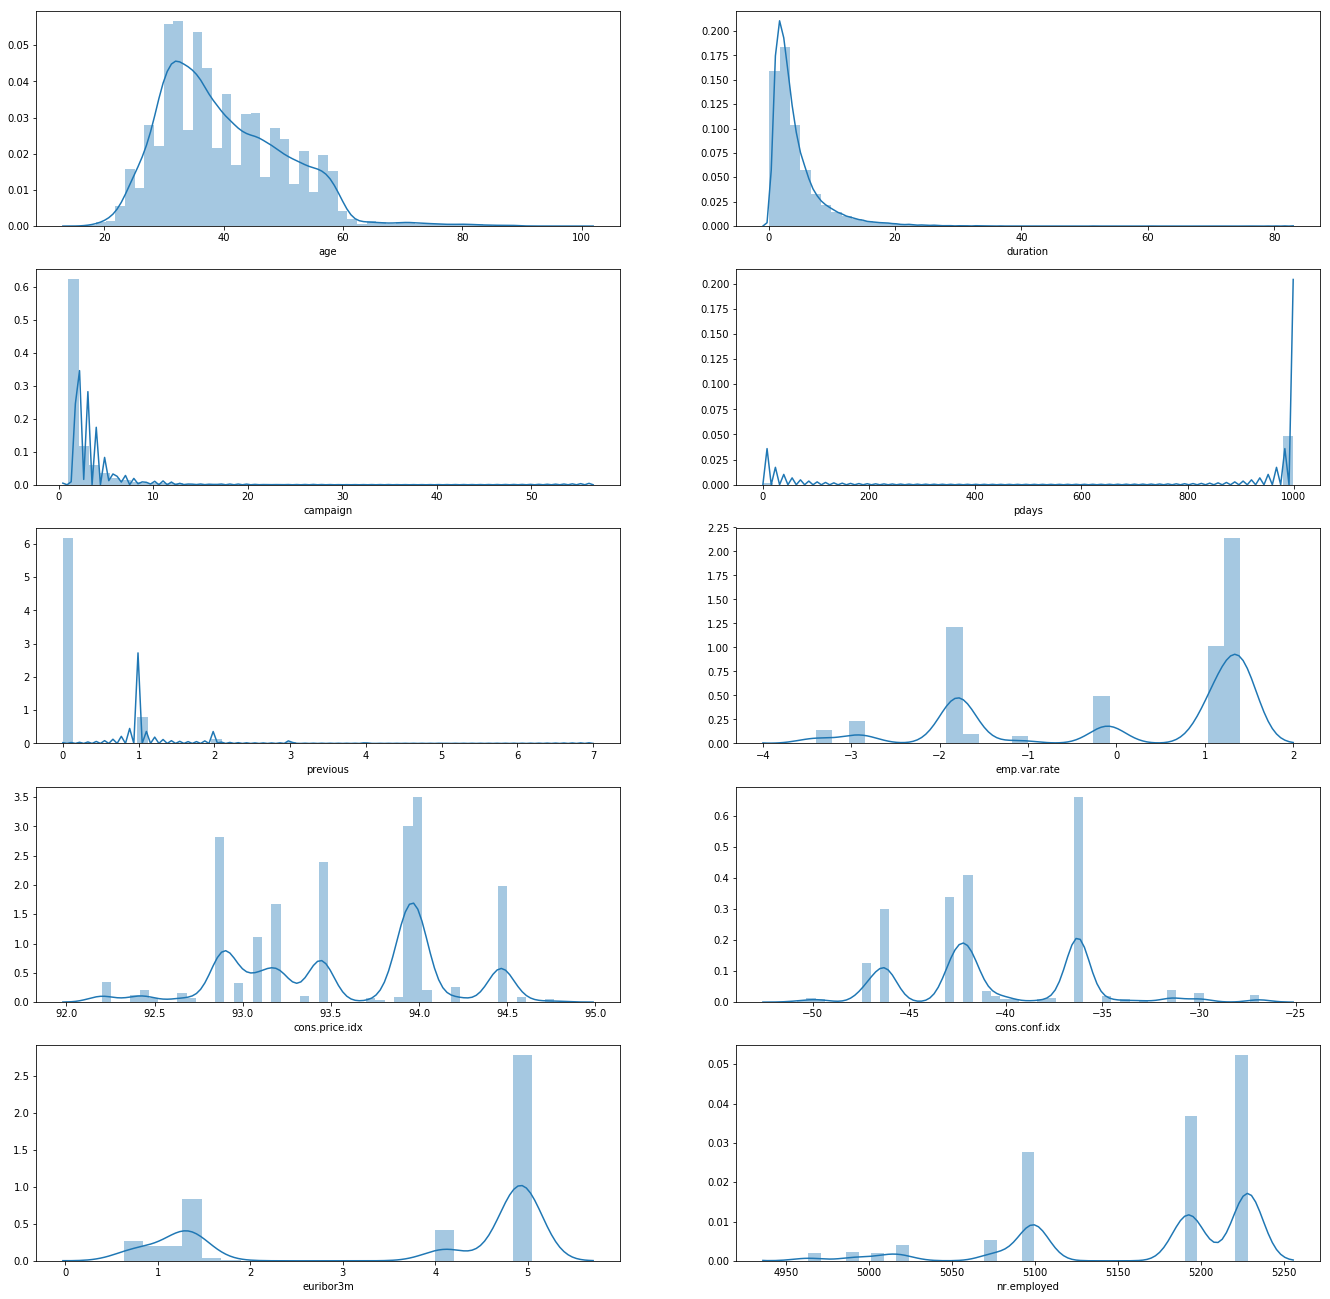

In [50]:
rows, cols = 5, 2
fig, ax = plt.subplots(rows, cols, figsize=(23,23))
row, col = 0, 0
for i, feature in enumerate(numerical):
    if col==cols-1:
        row+=1
    col = i%cols
    sns.distplot(df[feature], ax=ax[row,col])

## Insights
* **Age**: the bank has called people of from the age of 18 to about 100 but those contacted most are middle aged in there 30's
* **Duration**: the duration of calls is skewed. there are calls longer than 15 minutes, i will have to remove them, because they will affect our models prediction

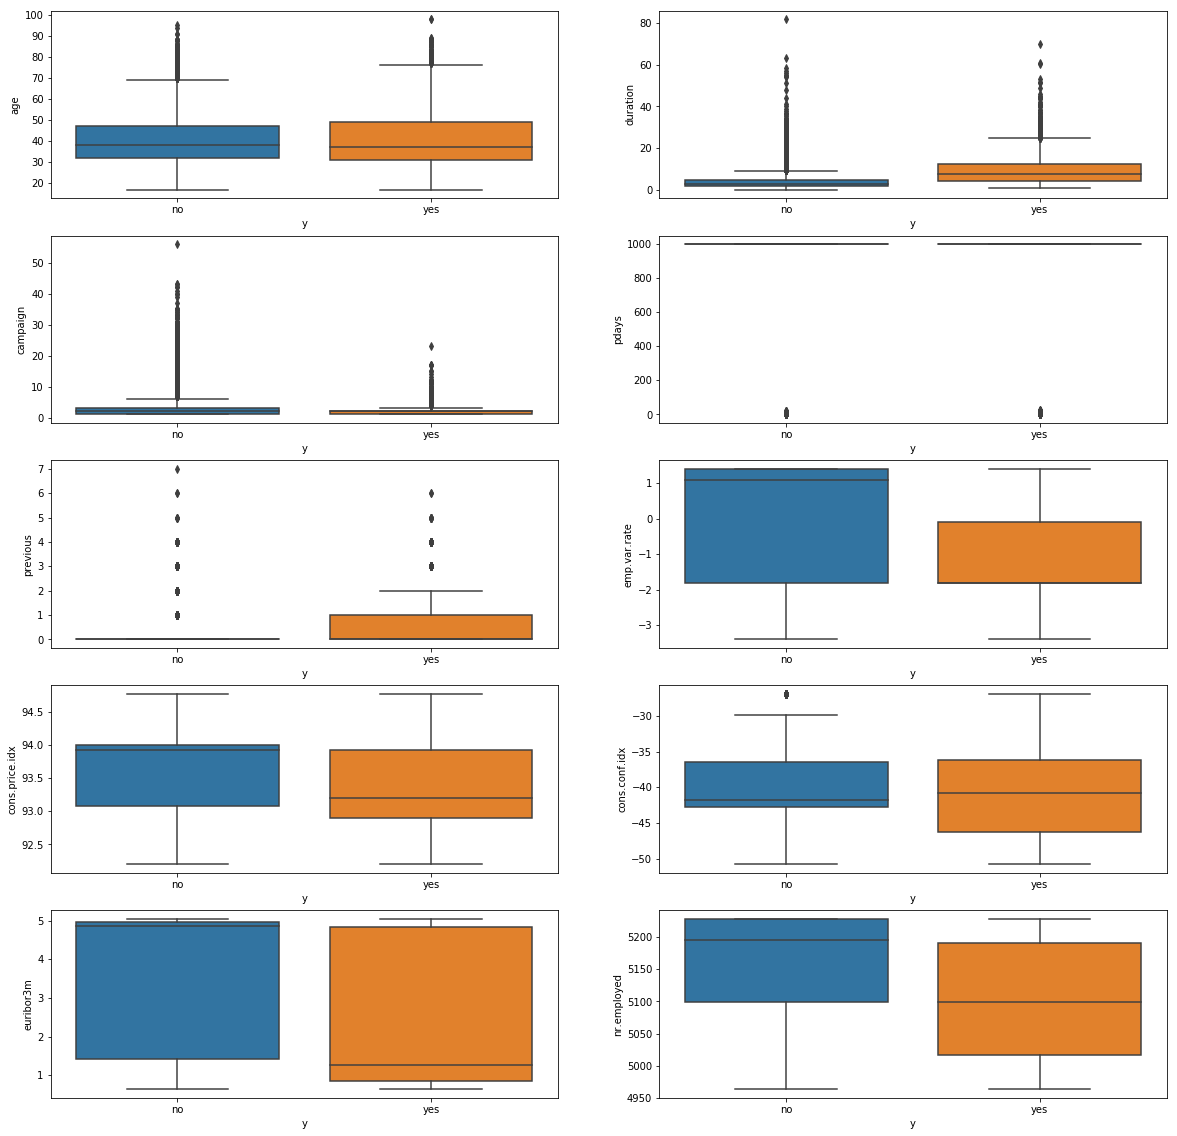

In [51]:
rows, cols = 5,2
fig, ax = plt.subplots(rows, cols, figsize=(20,20))
row, col =0, 0
for i, feature in enumerate(numerical):
    if col==cols-1:
        row+=1
    col = i%cols 
    box = sns.boxplot(y=df[feature], x=df.y, ax=ax[row, col])

In [52]:
# q1 = df.duration.quantile(.25)
# q3 = df.duration.quantile(.75)
# iqr = q3-q1

In [53]:
#remove outliers duration
# df = df[(df['duration']<(q1-1.5*iqr) )| (df['duration']<(q3+1.5*iqr))]

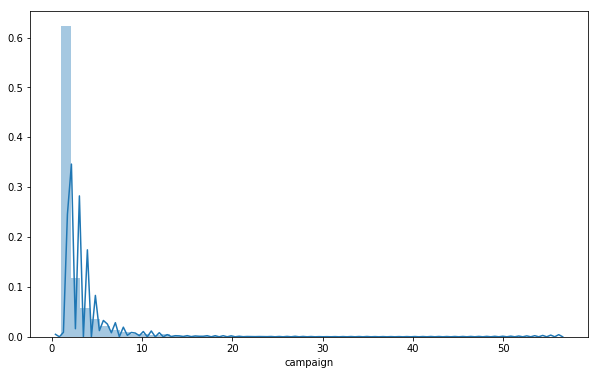

In [54]:
plt.figure(figsize=(10,6))
sns.distplot(df['campaign'])

Text(0.5,1,'Relationship between Duration of calls and Number of calls with client response')

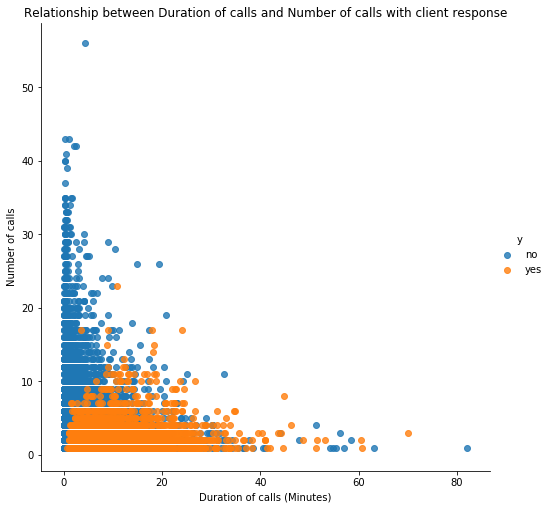

In [58]:
sns.lmplot(data=df, x='duration', y='campaign', hue='y',height=7, fit_reg=False)
plt.xlabel('Duration of calls (Minutes)')
plt.ylabel('Number of calls')
plt.title('Relationship between Duration of calls and Number of calls with client response')

### insights
the plot shows that clients that contacted for a shorter duration and a few times have a higher rate of subscription. 
so the bank should not persiste on calling clients for a long time and repeatedly

In [59]:
df2 = df.copy()

In [60]:
for col in [df2]:
    col.loc[col['age'] < 30, 'age_group'] = 20
    col.loc[(col['age']>=30)&(col['age']<=39), 'age_group'] = 30
    col.loc[(col['age']>=40)&(col['age']<=49), 'age_group'] = 40
    col.loc[(col['age']>=50)&(col['age']<=59), 'age_group'] = 50
    col.loc[col['age'] > 60, 'age_group'] = 60

In [61]:
df2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_group
0,56,housemaid,married,basic.4y,no,no,no,telephone,4,0,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,50.0
1,57,services,married,high.school,other,no,no,telephone,4,0,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,50.0
2,37,services,married,high.school,no,yes,no,telephone,4,0,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,30.0
3,40,admin.,married,basic.6y,no,no,no,telephone,4,0,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,40.0
4,56,services,married,high.school,no,no,yes,telephone,4,0,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,50.0


In [62]:
age_y_percentage = pd.crosstab(df2['y'], df2['age_group']).apply(lambda x: (x/x.sum()*100)).transpose()

In [63]:
age_y_percentage

y,no,yes
age_group,,
20.0,84.187165,15.812835
30.0,89.880410,10.119590
40.0,92.110533,7.889467
50.0,89.648741,10.351259
60.0,55.099502,44.900498


In [64]:
age = pd.DataFrame(df2['age_group'].value_counts())
age['% contacted'] = (age['age_group']/age['age_group'].sum())*100
age['% subscription'] = age_y_percentage['yes']
age['age'] = [30, 40, 50, 20, 60]

In [65]:
age = age.sort_values('age')

In [66]:
age_df = pd.DataFrame(df2.age_group.value_counts())
age_df['% contacted'] = (age_df['age_group']/age_df['age_group'].sum())*100
age_df['% subscribed'] = age_y_percentage['yes']

Text(0.5,1,'Subscription rate vs Contact Rate against Age groups')

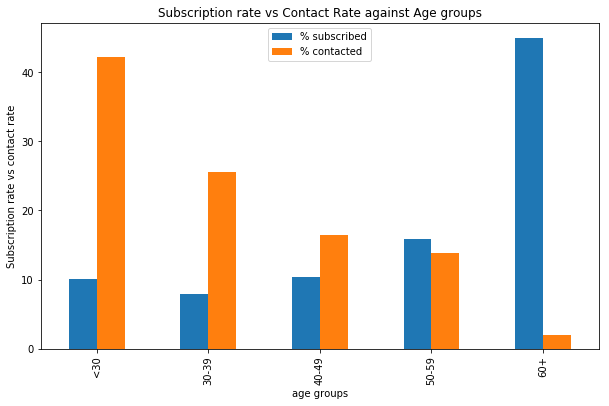

In [67]:
age_df[['% subscribed', '% contacted']].plot(kind='bar', figsize=(10,6))
plt.ylabel('Subscription rate vs contact rate')
plt.xlabel('age groups')
plt.xticks(range(5), ('<30', '30-39', '40-49', '50-59', '60+'))
plt.title('Subscription rate vs Contact Rate against Age groups')

* **The Bank should priotize the eldery(+60) and those below 30**. it seems the elderly are subcribing more because of retirement
* the campaign team pritoized the middle aged which had poor returns

In [68]:
loan_age1 = pd.DataFrame(df2.groupby(['age_group', 'loan'])['y'].count())
df2['y_binary'] = df2['y'].apply(lambda x: 0 if x == 'no' else 1)
loan_age2 = pd.DataFrame(df2.groupby(['age_group', 'loan'])['y_binary'].sum())

In [69]:
loan_age2['response'] = loan_age1['y']
loan_age2['response_rate'] = loan_age2['y_binary']/loan_age2['response']
loan_age2.drop(['response', 'y_binary'], axis=1, inplace=True)

In [70]:
loan_age2 = loan_age2.unstack()

In [71]:
loan_age2

response_rate                    
loan                 no     other       yes
age_group                                  
20.0           0.157159  0.160305  0.162901
30.0           0.103955  0.076142  0.090297
40.0           0.080053  0.091667  0.070423
50.0           0.101172  0.113924  0.114372
60.0           0.446108  0.555556  0.449153

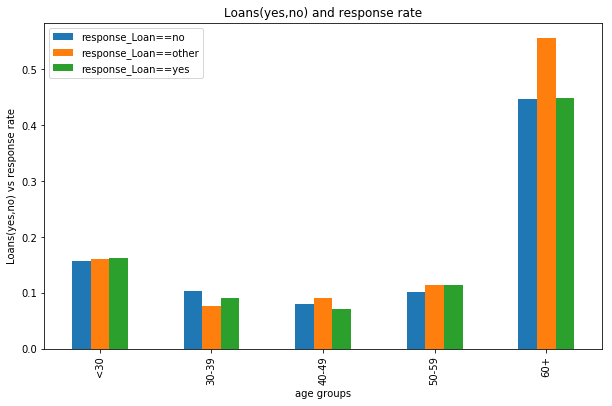

In [72]:
loan_age2.plot(kind='bar', figsize=(10,6))
plt.ylabel('Loans(yes,no) vs response rate')
plt.xlabel('age groups')
plt.xticks(range(5), ('<30', '30-39', '40-49', '50-59', '60+'))
plt.title('Loans(yes,no) and response rate')
plt.legend(['response_Loan==no', 'response_Loan==other', 'response_Loan==yes'])

older people tend to subscribe more, the bank priotize them because the have a higher **response rate(subscription)**

In [73]:
job_response = pd.crosstab(df2['y'], df2['job']).apply(lambda x: (x/x.sum())*100).transpose()

In [74]:
job_response

y,no,yes
job,,
admin.,87.051636,12.948364
blue-collar,93.008426,6.991574
entrepreneur,91.404011,8.595989
housemaid,90.078585,9.921415
management,88.992137,11.007863
other,89.949749,10.050251
retired,75.262184,24.737816
self-employed,89.409222,10.590778
services,92.018903,7.981097


Text(0.5,1,'subscription rate per JOB')

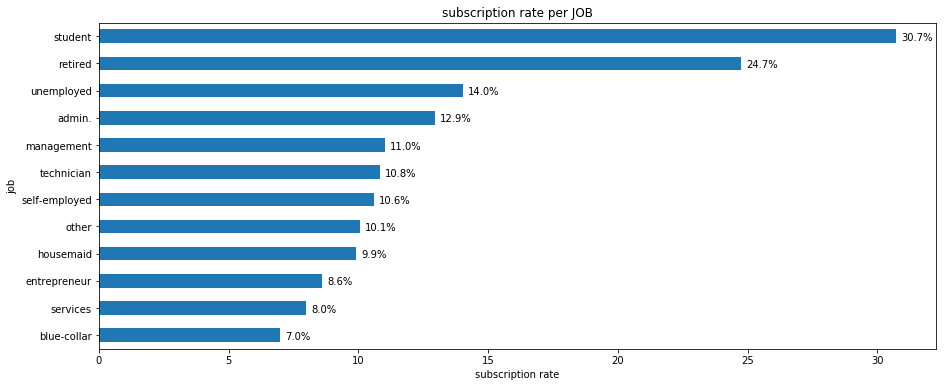

In [75]:
barh_plot = job_response['yes'].sort_values().plot(kind='barh', figsize=(15,6))
for patch, label in zip(barh_plot.patches, job_response['yes'].sort_values().round(1).astype(str)):
    barh_plot.text(patch.get_width()+.2, patch.get_y()+.1, label+'%')
plt.xlabel('subscription rate')
plt.title('subscription rate per JOB')

**Students and Retired People yet have the most subscriptions rates**

### Multivariate analysis

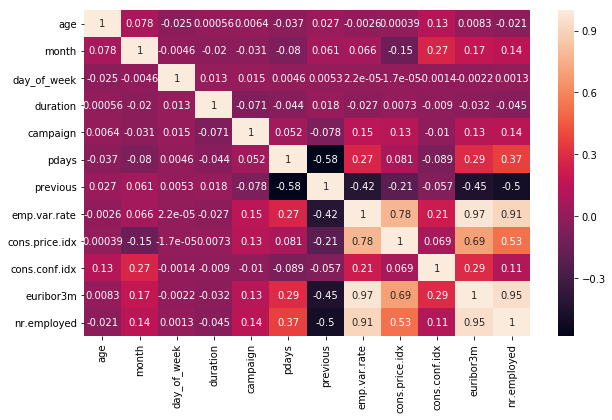

In [122]:
corr = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True)

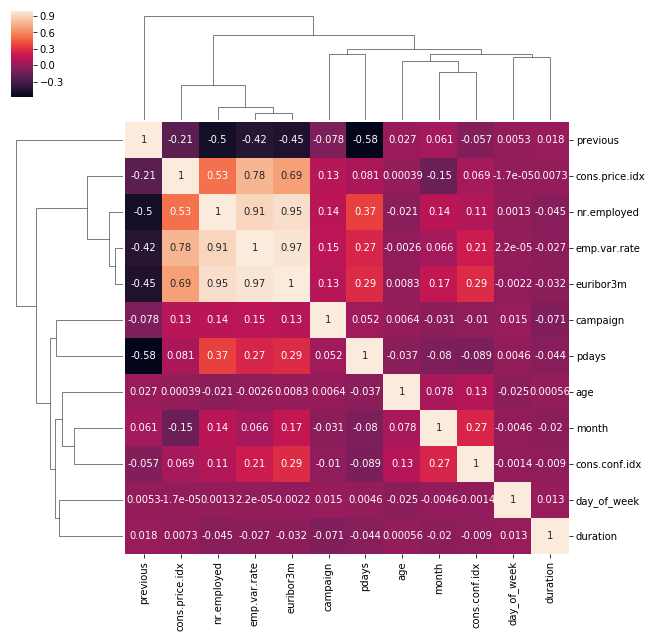

In [138]:
corr = df.corr()
plt.figure(figsize=(10,6))
sns.clustermap(corr, annot=True)

### insights 
* emp.var.rate(employment variation rate) is highly collinear with  nr.employed(number of employees) and euribor3m(euribor 3 month rate)/euro interest rate. illl use variance inflation factor to remove one of th features
* cons.price.idx(consumer confidence index) is collinear with euribor3m, emp.var.rate and nr.employed will check them out using variance_inflation_factor too

In [123]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [124]:
numerical

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [145]:
X = final_df[[
'age',
'month', 
'day_of_week',
'duration',
'campaign',
'pdays',
'previous',
'emp.var.rate',
'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed'
]]
X['Intercept'] = 1
vif = pd.DataFrame()
vif['variables'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

c:\users\musaho\anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [146]:
print(vif.round(2))

         variables          VIF
0              age         1.02
1            month         1.56
2      day_of_week         1.00
3         duration         1.03
4         campaign         1.05
5            pdays         1.42
6         previous         1.65
7     emp.var.rate        35.11
8   cons.price.idx         7.17
9    cons.conf.idx         2.76
10       euribor3m        81.22
11     nr.employed        34.29
12       Intercept  15138433.08


**like our previous analysis the VIF shows us that emp.var.rate , eurribor3m and nr.employed have a high VIF, i will remove the latter 2**. **cons.price.idx has a high VIF but its lower than the threshold(10) am using.**

In [76]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,4,0,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,other,no,no,telephone,4,0,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,4,0,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,4,0,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,4,0,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [77]:
df.describe()

,age,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,39368.000000,39368.000000,39368.000000,39368.000000,39368.000000,39368.000000,39368.000000,39368.000000,39368.000000,39368.000000,39368.000000,39368.000000
mean,39.879166,5.612147,2.573537,4.311314,2.564824,963.332148,0.170418,0.084429,93.571516,-40.527588,3.626093,5167.537904
std,10.294278,2.044796,1.851740,4.331911,2.768071,184.794818,0.487809,1.567650,0.577245,4.624085,1.729727,71.622719
min,17.000000,2.000000,0.000000,0.120000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,4.000000,1.000000,1.720000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,5.000000,3.000000,3.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000
75%,47.000000,7.000000,4.000000,5.320000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,11.000000,5.000000,81.970000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [114]:
final_df = df.copy()

In [115]:
final_df['pdays'] = final_df['pdays'].replace(999, -1)

In [116]:
final_df['nr.employed'] = np.log(final_df['nr.employed'] + 1)
final_df['age'] = np.log(final_df['age'] + 1)
final_df['duration'] = np.log(final_df['duration'] + 1)

In [117]:
final_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,4.043051,housemaid,married,basic.4y,no,no,no,telephone,4,0,...,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,8.554874,no
1,4.060443,services,married,high.school,other,no,no,telephone,4,0,...,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,8.554874,no
2,3.637586,services,married,high.school,no,yes,no,telephone,4,0,...,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,8.554874,no
3,3.713572,admin.,married,basic.6y,no,no,no,telephone,4,0,...,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,8.554874,no
4,4.043051,services,married,high.school,no,no,yes,telephone,4,0,...,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,8.554874,no


In [118]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39368 entries, 0 to 41187
Data columns (total 21 columns):
age               39368 non-null float64
job               39368 non-null object
marital           39368 non-null object
education         39368 non-null object
default           39368 non-null object
housing           39368 non-null object
loan              39368 non-null object
contact           39368 non-null object
month             39368 non-null int64
day_of_week       39368 non-null int64
duration          39368 non-null float64
campaign          39368 non-null int64
pdays             39368 non-null int64
previous          39368 non-null int64
poutcome          39368 non-null object
emp.var.rate      39368 non-null float64
cons.price.idx    39368 non-null float64
cons.conf.idx     39368 non-null float64
euribor3m         39368 non-null float64
nr.employed       39368 non-null float64
y                 39368 non-null object
dtypes: float64(7), int64(5), object(9)
memory us

In [119]:
final_df['contact'] = final_df['contact'].apply(lambda x: 0 if x=='telephone' else 1)
final_df = pd.get_dummies(data=final_df, columns=['job', 'marital', 'education', 'default', 'housing', 'poutcome', 'loan'])

In [147]:
X = final_df.drop('y', axis=1)
y = final_df.y

In [163]:
y = y.apply(lambda x: 0 if x=='no' else 1)

In [158]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgbm

from sklearn.metrics import make_scorer

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [153]:
models= [
    ('LR', LogisticRegression()),
    ('NB', GaussianNB()),
    ('KNN', KNeighborsClassifier()),
    ('XGB', xgb.XGBClassifier()),
    ('LGBM', lgbm.LGBMClassifier())
]

In [165]:
results=[]
model_name=[]
scorer = make_scorer(roc_auc_score)

for name, model in models:
    fold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X=X_train, y=y_train, cv=fold, scoring=scorer)
    results.append(cv_results)
    model_name.append(name)
    print('{}: CV_results {}, ({})'.format(name, cv_results.mean(), cv_results.std()))

c:\users\musaho\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\musaho\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\musaho\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\musaho\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\musaho\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

LR: CV_results 0.6919464495390757, (0.017507353744876254)
NB: CV_results 0.7275693348284421, (0.009992616880840277)
KNN: CV_results 0.6519016791999602, (0.011788705586087495)
XGB: CV_results 0.7302806332992362, (0.01736266583348019)
LGBM: CV_results 0.7531133365715519, (0.01407020151663387)


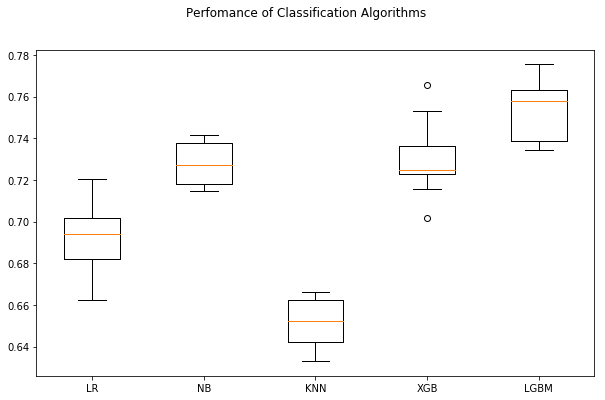

In [168]:
fig = plt.figure(figsize=(10,6))
fig.suptitle('Perfomance of Classification Algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(model_name)
plt.show()

### Interpratability of models

The LightGM Model outperforms all models but at the expense of having a high variance with a roc_auc_score of 75% with std of 0.014, while the GaussianNB model had a roc_auc_score of 73% with std of 0.00999. ill use The Naives Bayes Model(GuassianNB) because of it interpretability(its clear for each feature how much it affects the prediction)

In [170]:
nb = GaussianNB()

In [230]:
nb.fit(X_train, y_train)
preds = nb.predict(X_test)

In [232]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve

In [233]:
print(classification_report(y_test, preds)), print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

           0       0.96      0.80      0.87     10526
           1       0.30      0.70      0.41      1285

    accuracy                           0.79     11811
   macro avg       0.63      0.75      0.64     11811
weighted avg       0.88      0.79      0.82     11811

[[8385 2141]
 [ 389  896]]


(None, None)

Text(0.5,0,'False Positive Rate')

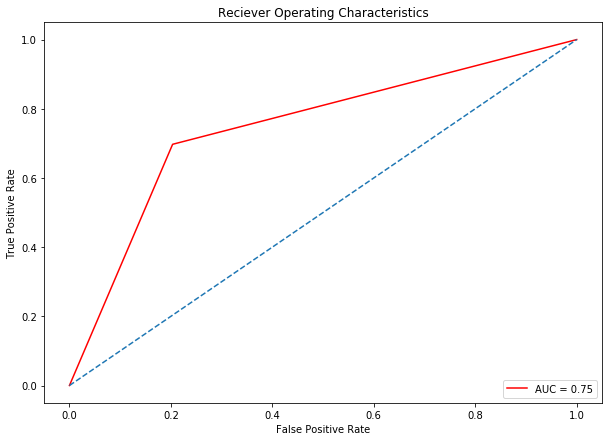

In [237]:
fpr, tpr, thr = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,7))
plt.title('Reciever Operating Characteristics')
plt.plot(fpr,tpr, color='red', label='AUC = %0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Conclusion

### USEFUL features
* students and retired people
* Clients with age less than 30 or 60 and above
* older People age 60+ with loans

A naive bayes model was successfully built for the classifcation problem. The bank will be able to predict a client's response to its telemarketing campaign before contacting him/her. 
The bank should priotize clients who are highly likely to accept term deposits, and call less to those who are unlikely to make term deposits.

NOTE: **Predicting duration of calls can benefit both the bank and its clients. it will increase the efficiency of the bank’s telemarketing campaign, saving time, expenses and prevents some clients from receiving useless calls. This can be done using REGRESSION MODELS WHICH WEREN'T IMPLEMENTED IN THIS NOTEBOOK**